In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
sns.set()

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samira1992/gene-expression-bioinformatics-dataset")

print("Path to dataset files:", path)

100%|██████████| 177k/177k [00:00<00:00, 55.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samira1992/gene-expression-bioinformatics-dataset/versions/1


In [3]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/samira1992/gene-expression-bioinformatics-dataset/versions/1/Spellman.csv')
df.head()

,time,40,50,60,70,80,90,100,110,120,...,170,180,190,200,210,220,230,240,250,260
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,0.59,0.34,-0.28,-0.09,-0.44,0.31,0.03,0.57,0.00,0.010
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,-0.30,-0.38,0.07,-0.04,0.13,-0.06,-0.26,-0.10,0.27,0.235
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,0.12,-0.17,0.11,-0.15,0.03,-0.26,-0.34,-0.34,0.25,0.190
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,0.07,0.61,-0.20,0.49,-0.43,0.80,-0.47,1.01,-0.36,-0.405
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,-0.48,-0.40,-0.59,0.54,-0.09,1.03,0.08,0.57,-0.26,-0.310


In [4]:
df.shape

(4381, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    4381 non-null   object 
 1   40      4381 non-null   float64
 2   50      4381 non-null   float64
 3   60      4381 non-null   float64
 4   70      4381 non-null   float64
 5   80      4381 non-null   float64
 6   90      4381 non-null   float64
 7   100     4381 non-null   float64
 8   110     4381 non-null   float64
 9   120     4381 non-null   float64
 10  130     4381 non-null   float64
 11  140     4381 non-null   float64
 12  150     4381 non-null   float64
 13  160     4381 non-null   float64
 14  170     4381 non-null   float64
 15  180     4381 non-null   float64
 16  190     4381 non-null   float64
 17  200     4381 non-null   float64
 18  210     4381 non-null   float64
 19  220     4381 non-null   float64
 20  230     4381 non-null   float64
 21  240     4381 non-null   float64
 22  

In [6]:
df.apply(pd.isnull).sum()

,0
time,0
40,0
50,0
60,0
70,0
80,0
90,0
100,0
110,0
120,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['time', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130',
       '140', '150', '160', '170', '180', '190', '200', '210', '220', '230',
       '240', '250', '260'],
      dtype='object')

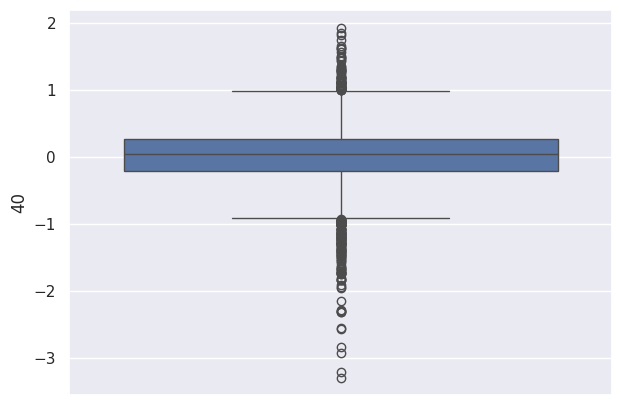

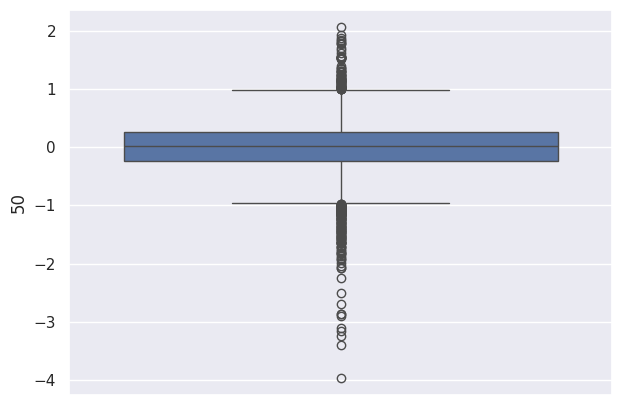

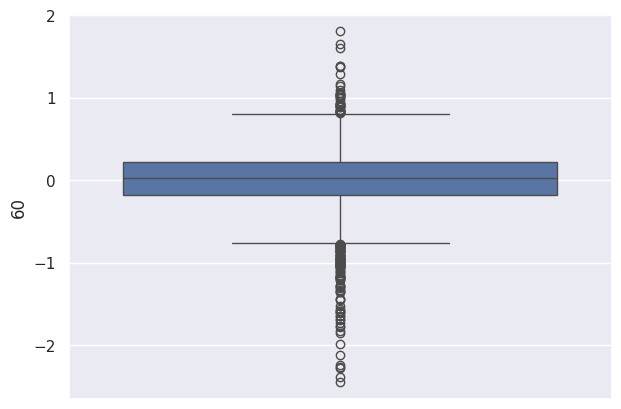

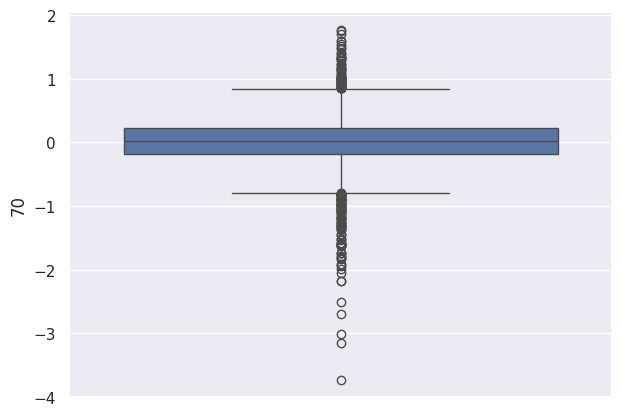

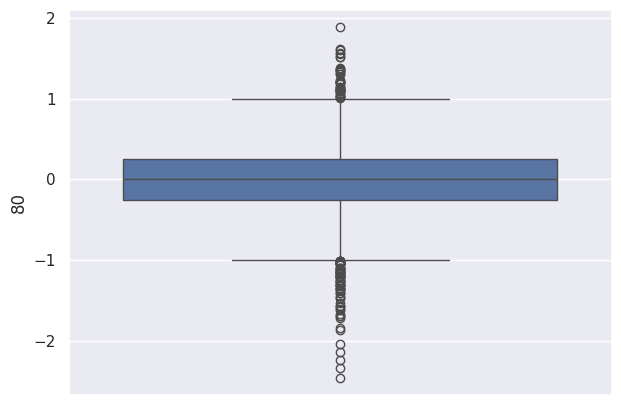

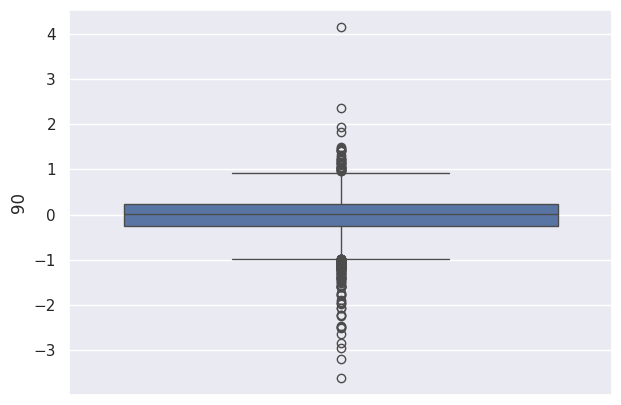

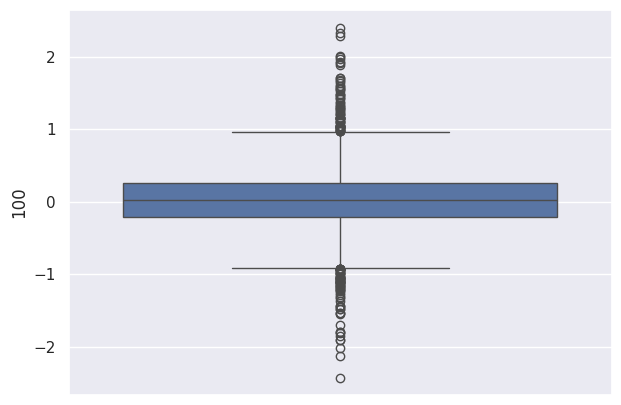

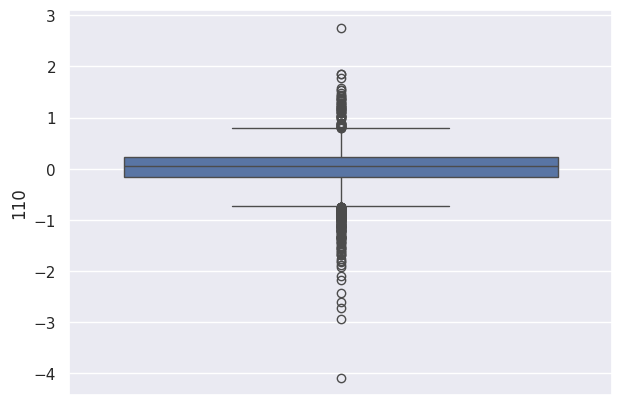

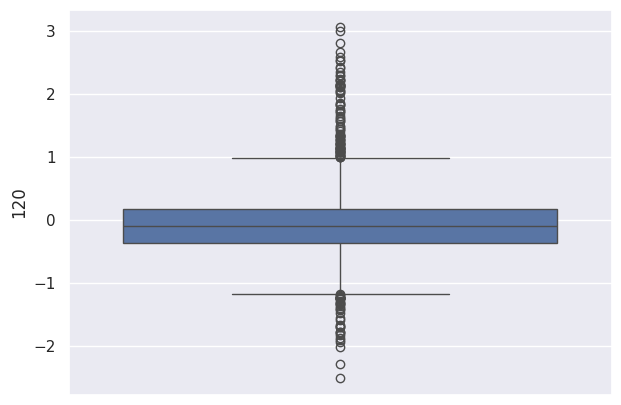

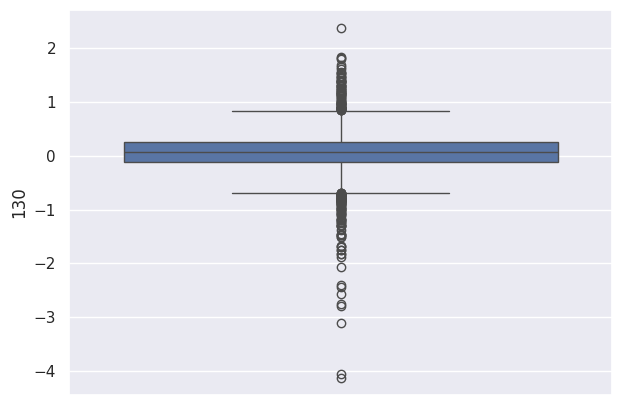

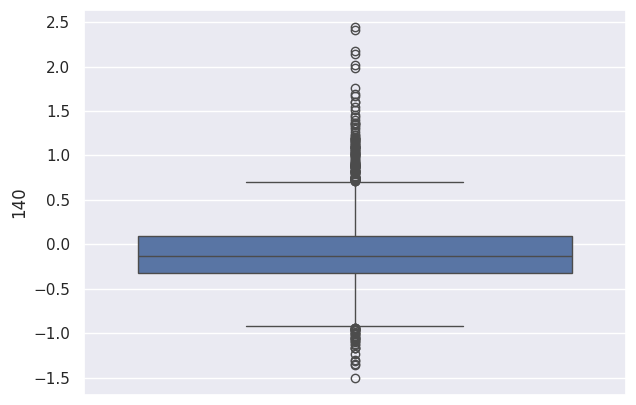

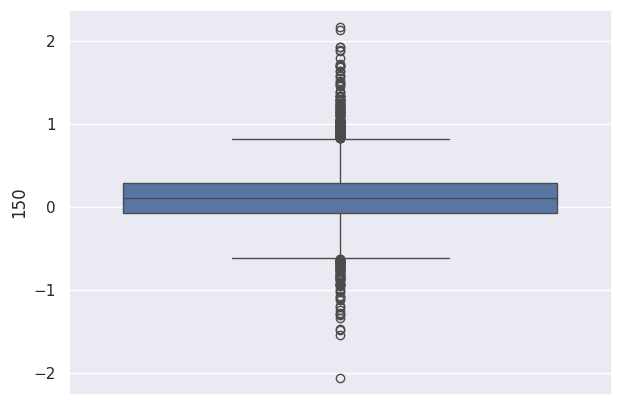

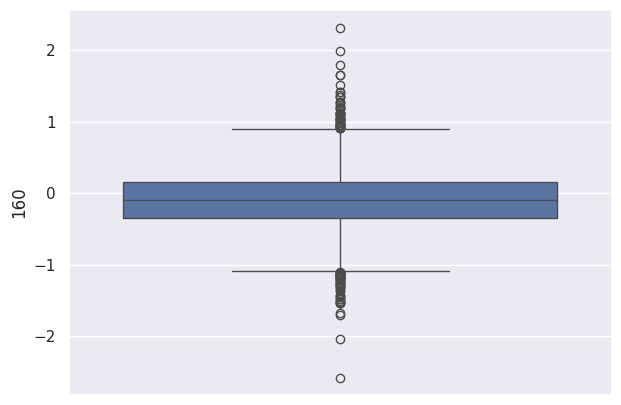

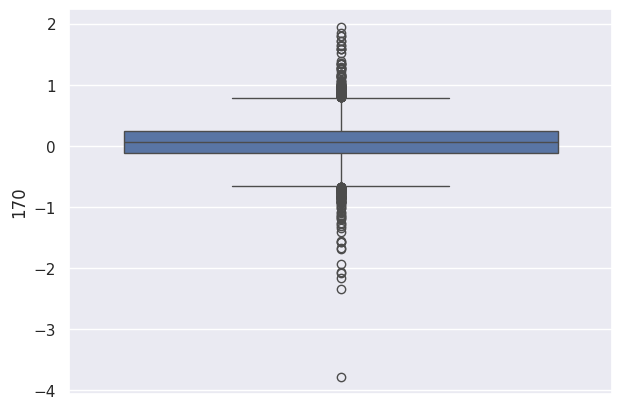

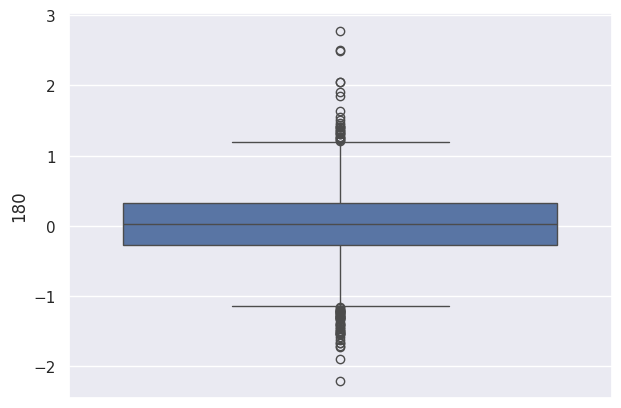

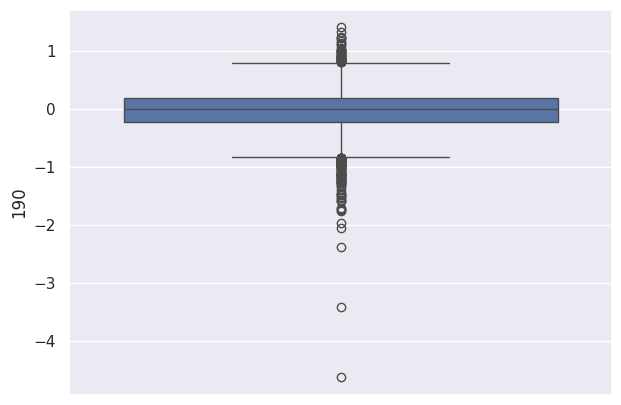

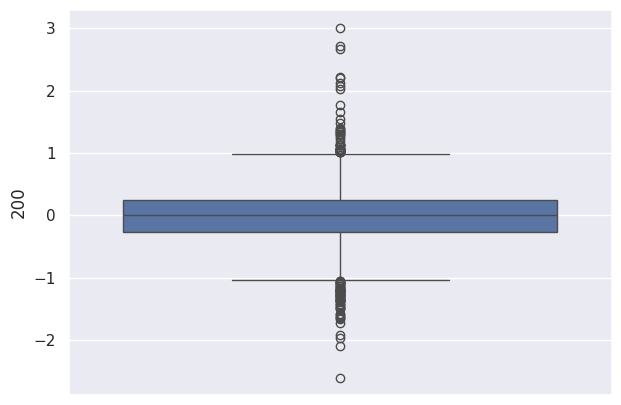

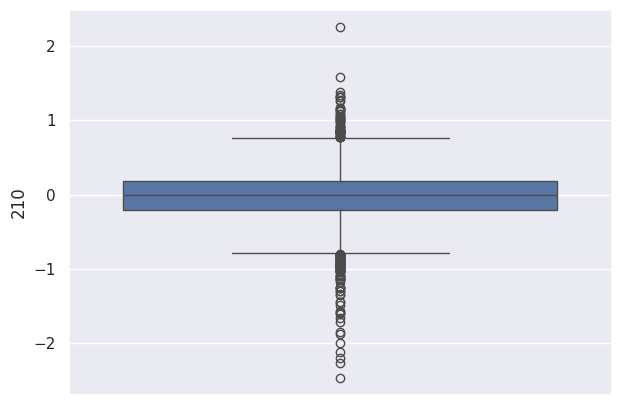

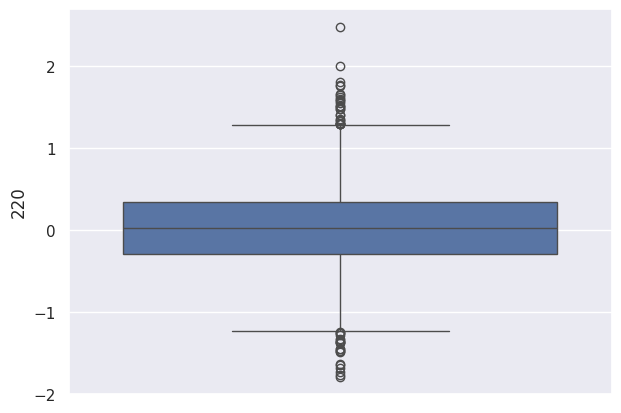

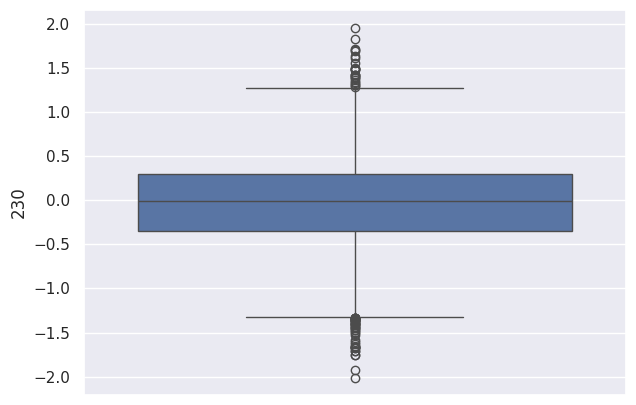

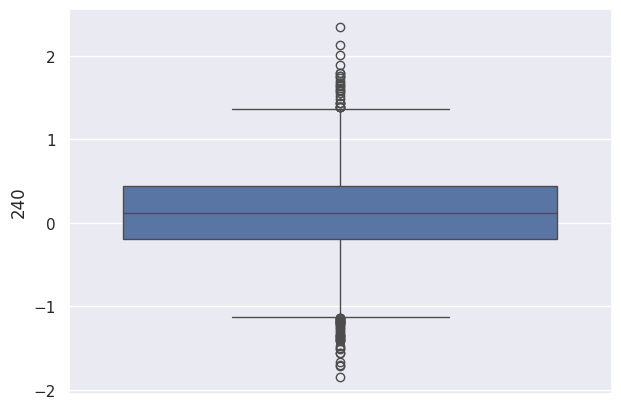

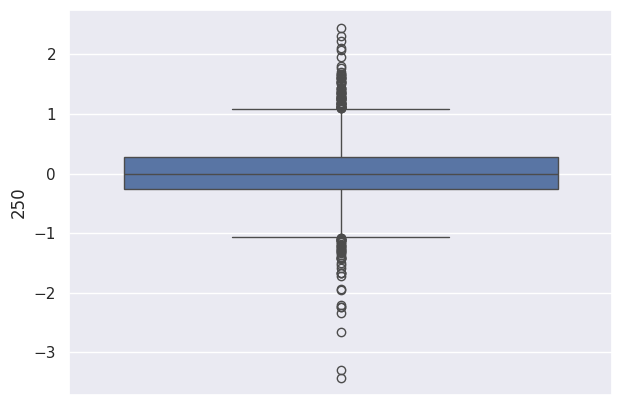

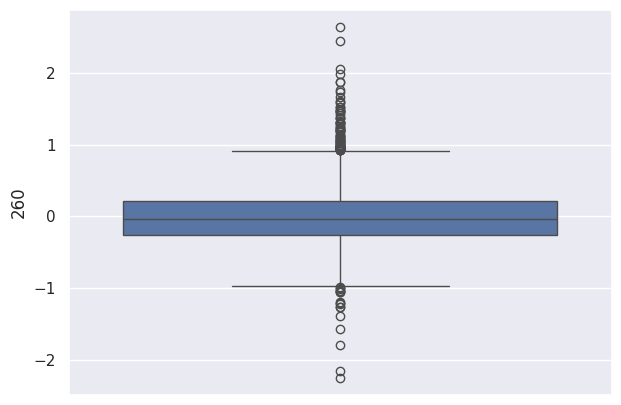

In [9]:
for column in df.columns:
  if df[column].dtype != 'object':
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df, y = column)
    plt.show()

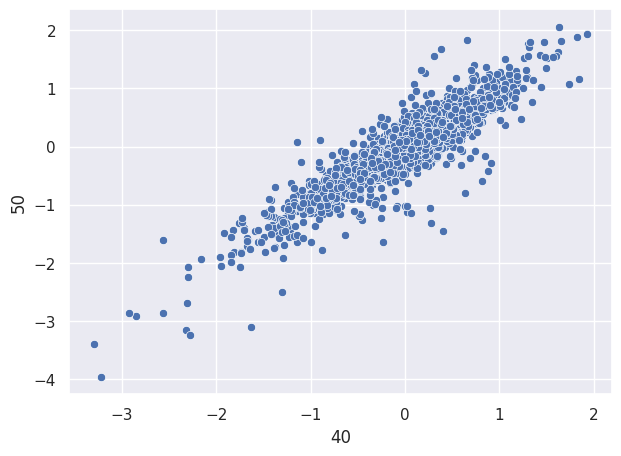

In [10]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = '40', y = '50')
plt.show()

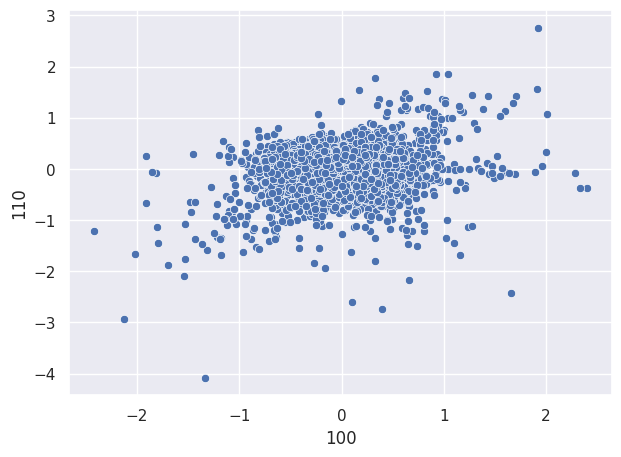

In [11]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = '100', y = '110')
plt.show()

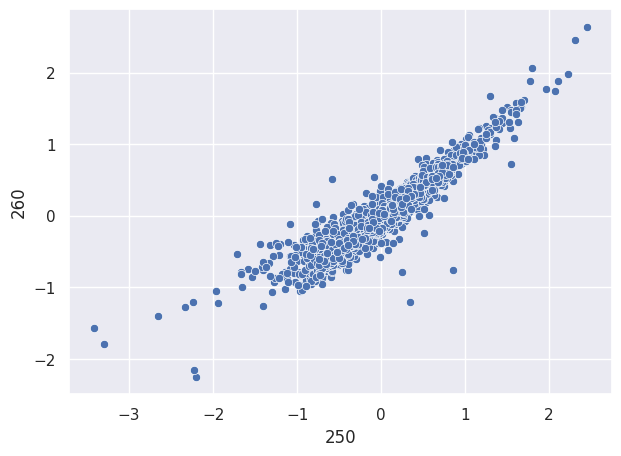

In [12]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = '250', y = '260')
plt.show()

In [13]:
numerical_columns = []
for column in df.columns:
  if df[column].dtype != 'object':
    numerical_columns.append(column)

In [14]:
data = df.copy()

In [15]:
scaler = StandardScaler()

In [16]:
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [17]:
df.head()

,time,40,50,60,70,80,90,100,110,120,...,170,180,190,200,210,220,230,240,250,260
0,YAL001C,-0.165641,-0.465353,-0.285841,0.040760,-0.069790,-0.209735,-0.741245,-1.192799,-0.023926,...,1.539446,0.672695,-0.683839,-0.160737,-1.196625,0.593812,0.134864,0.909747,-0.036243,0.056774
1,YAL014C,0.445059,0.203461,0.060407,-0.134628,-0.069790,0.025536,-1.296158,-0.246375,0.162400,...,-1.051352,-0.852083,0.286793,-0.044200,0.447091,-0.172514,-0.441195,-0.440785,0.552475,0.627943
2,YAL016W,0.305777,0.328863,0.600556,0.692204,-0.211102,0.425496,-1.826944,0.463443,-0.148143,...,0.171272,-0.407356,0.397723,-0.300582,0.158719,-0.586744,-0.600108,-0.924558,0.508866,0.513709
3,YAL020C,-0.765626,-0.569855,-0.604390,-0.410239,0.401249,-0.209735,0.561593,-0.036059,0.431538,...,0.025721,1.244487,-0.461980,1.191098,-1.167788,1.608676,-0.858341,1.796664,-0.821200,-0.996716
4,YAL022C,-0.904909,-1.217768,-1.615437,-1.462571,-0.187550,-0.727331,1.116505,0.805207,2.543235,...,-1.575333,-0.894438,-1.543541,1.307636,-0.187326,2.085041,0.234184,0.909747,-0.603156,-0.755556


In [18]:
data.head()

,time,40,50,60,70,80,90,100,110,120,...,170,180,190,200,210,220,230,240,250,260
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,0.59,0.34,-0.28,-0.09,-0.44,0.31,0.03,0.57,0.00,0.010
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,-0.30,-0.38,0.07,-0.04,0.13,-0.06,-0.26,-0.10,0.27,0.235
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,0.12,-0.17,0.11,-0.15,0.03,-0.26,-0.34,-0.34,0.25,0.190
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,0.07,0.61,-0.20,0.49,-0.43,0.80,-0.47,1.01,-0.36,-0.405
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,-0.48,-0.40,-0.59,0.54,-0.09,1.03,0.08,0.57,-0.26,-0.310


In [19]:
df.drop(columns = ['time'], axis = 1, inplace = True)

In [20]:
df.head()

,40,50,60,70,80,90,100,110,120,130,...,170,180,190,200,210,220,230,240,250,260
0,-0.165641,-0.465353,-0.285841,0.040760,-0.069790,-0.209735,-0.741245,-1.192799,-0.023926,0.170751,...,1.539446,0.672695,-0.683839,-0.160737,-1.196625,0.593812,0.134864,0.909747,-0.036243,0.056774
1,0.445059,0.203461,0.060407,-0.134628,-0.069790,0.025536,-1.296158,-0.246375,0.162400,1.079793,...,-1.051352,-0.852083,0.286793,-0.044200,0.447091,-0.172514,-0.441195,-0.440785,0.552475,0.627943
2,0.305777,0.328863,0.600556,0.692204,-0.211102,0.425496,-1.826944,0.463443,-0.148143,0.625272,...,0.171272,-0.407356,0.397723,-0.300582,0.158719,-0.586744,-0.600108,-0.924558,0.508866,0.513709
3,-0.765626,-0.569855,-0.604390,-0.410239,0.401249,-0.209735,0.561593,-0.036059,0.431538,-0.684818,...,0.025721,1.244487,-0.461980,1.191098,-1.167788,1.608676,-0.858341,1.796664,-0.821200,-0.996716
4,-0.904909,-1.217768,-1.615437,-1.462571,-0.187550,-0.727331,1.116505,0.805207,2.543235,0.384644,...,-1.575333,-0.894438,-1.543541,1.307636,-0.187326,2.085041,0.234184,0.909747,-0.603156,-0.755556


In [29]:
inertia_scores, silhouette = [], []
for i in range(2, 41):
  km = KMeans(n_clusters = i, init = 'k-means++')
  km.fit(df)
  inertia_scores.append(km.inertia_)
  silhouette.append(silhouette_score(df, km.labels_))

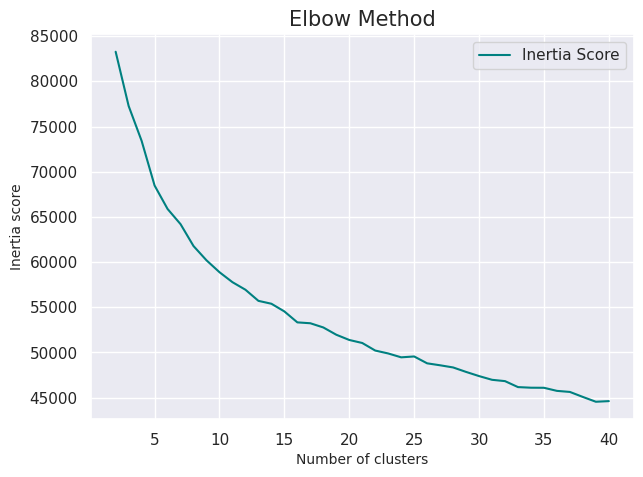

In [31]:
plt.figure(figsize = (7, 5))
plt.plot(range(2, 41), inertia_scores, label = 'Inertia Score', color = 'teal')
plt.title('Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Inertia score', fontsize = 10)
plt.legend()
plt.show()

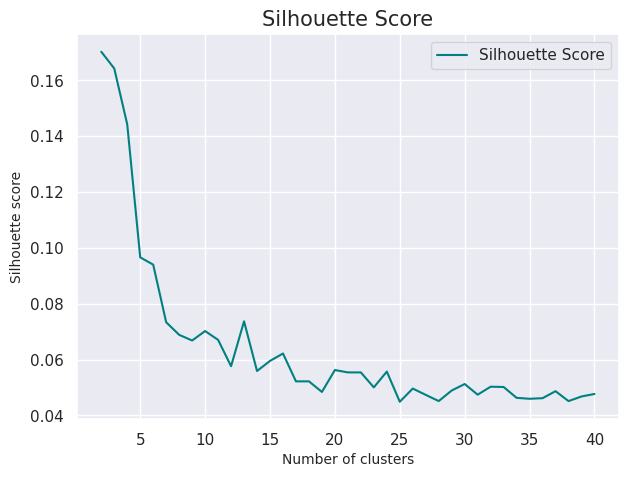

In [32]:
plt.figure(figsize = (7, 5))
plt.plot(range(2, 41), silhouette, label = 'Silhouette Score', color = 'teal')
plt.title('Silhouette Score', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette score', fontsize = 10)
plt.legend()
plt.show()

In [33]:
kmeans_model = KMeans(n_clusters = 20, init = 'k-means++')
kmeans_model.fit(df)
data['clusters'] = kmeans_model.labels_

In [34]:
data['clusters'].value_counts()

,count
clusters,
5,541
4,504
3,414
7,392
2,338
1,319
9,304
0,258
6,203


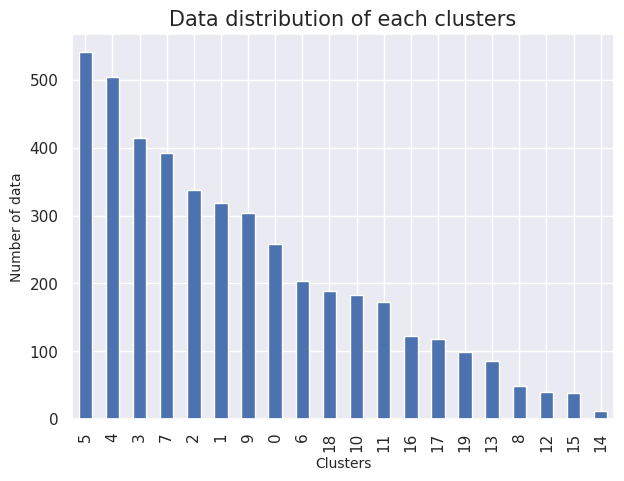

In [35]:
data['clusters'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each clusters', fontsize = 15)
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

In [36]:
kmeans_model2 = KMeans(n_clusters = 13, init = 'k-means++')
kmeans_model2.fit(df)
data['clusters2'] = kmeans_model2.labels_

In [37]:
data['clusters2'].value_counts()

,count
clusters2,
5,664
4,652
12,544
6,520
2,514
0,393
8,343
11,329
3,116


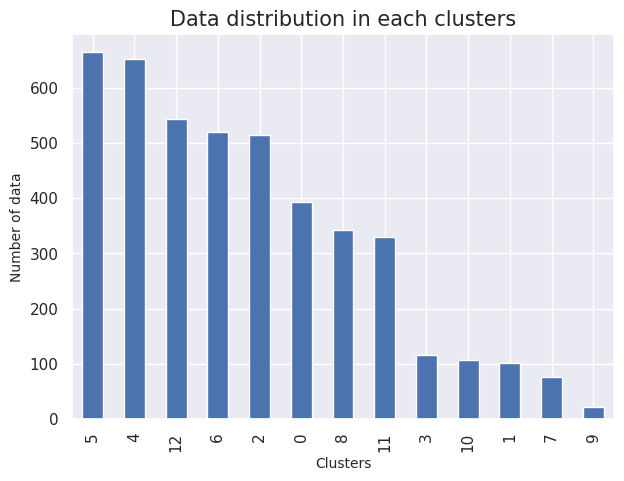

In [38]:
data['clusters2'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution in each clusters', fontsize = 15)
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

In [43]:
data.head()

,time,40,50,60,70,80,90,100,110,120,...,190,200,210,220,230,240,250,260,clusters,clusters2
0,YAL001C,-0.070,-0.23,-0.100,0.03,-0.04,-0.12,-0.28,-0.44,-0.09,...,-0.28,-0.09,-0.44,0.31,0.03,0.57,0.00,0.010,0,6
1,YAL014C,0.215,0.09,0.025,-0.04,-0.04,-0.02,-0.51,-0.08,0.00,...,0.07,-0.04,0.13,-0.06,-0.26,-0.10,0.27,0.235,5,5
2,YAL016W,0.150,0.15,0.220,0.29,-0.10,0.15,-0.73,0.19,-0.15,...,0.11,-0.15,0.03,-0.26,-0.34,-0.34,0.25,0.190,4,4
3,YAL020C,-0.350,-0.28,-0.215,-0.15,0.16,-0.12,0.26,0.00,0.13,...,-0.20,0.49,-0.43,0.80,-0.47,1.01,-0.36,-0.405,7,8
4,YAL022C,-0.415,-0.59,-0.580,-0.57,-0.09,-0.34,0.49,0.32,1.15,...,-0.59,0.54,-0.09,1.03,0.08,0.57,-0.26,-0.310,18,8


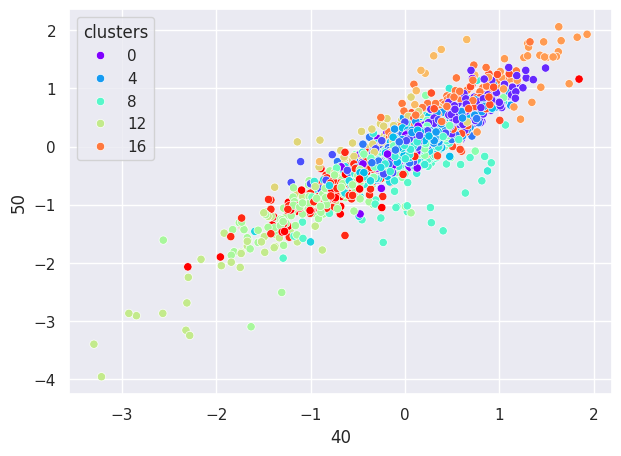

In [45]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = data, x = '40', y = '50', hue = 'clusters', palette = 'rainbow')
plt.show()

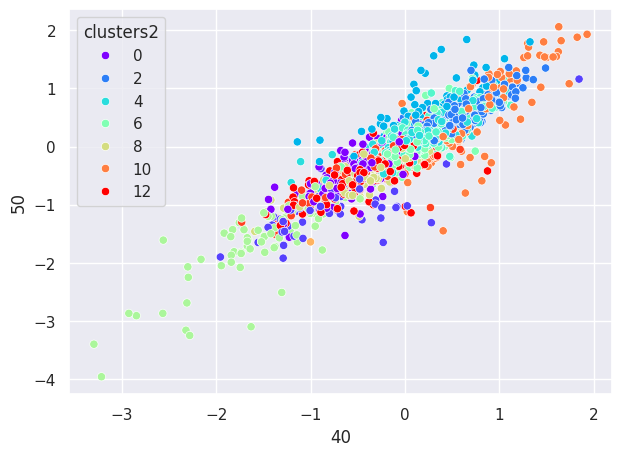

In [46]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = data, x = '40', y = '50', hue = 'clusters2', palette = 'rainbow')
plt.show()

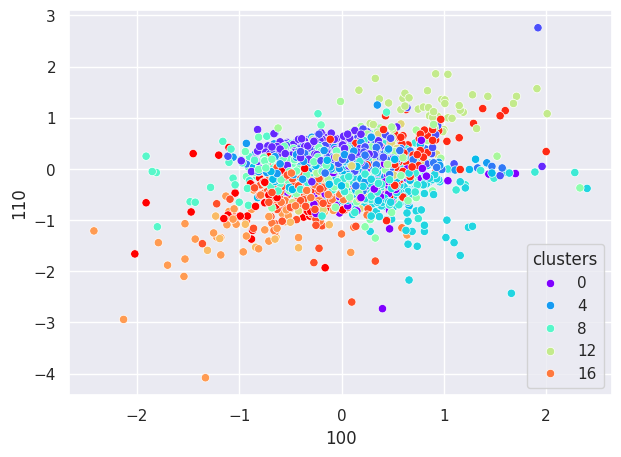

In [47]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = data, x = '100', y = '110', hue = 'clusters', palette = 'rainbow')
plt.show()

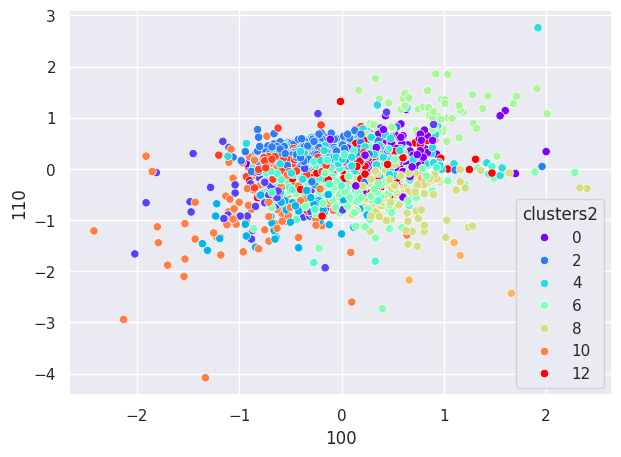

In [48]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = data, x = '100', y = '110', hue = 'clusters2', palette = 'rainbow')
plt.show()